In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

# Read in polygon geojson
Metro Parks Boundaries (GIS) - https://data.nashville.gov/Parks/Metro-Parks-Boundaries-GIS-/728b-6yiv

In [2]:
metroparks = gpd.read_file('../data/metroparks.geojson')
print(metroparks.crs)
metroparks.head()

epsg:4326


,acres,name,year_estab,common_nam,status,address,lon,lat,descriptio,geometry
0,69.86,Harpeth River Park,1988,Harpeth River,PARK,7820 Coley Davis Rd,-86.9592214,36.07738249,Harpeth River State Park has much historical a...,"MULTIPOLYGON (((-86.95547 36.07930, -86.95578 ..."
1,9.88,Harpeth Knoll Park,1972,Harpeth Knoll,PARK,708 Goodpasture Terrace,-86.93815537,36.05942777,"Huge grassy field with playground, and shade s...","MULTIPOLYGON (((-86.93860 36.06077, -86.93742 ..."
2,17.14,Bellevue Park,1982,Red Caboose,PARK,656 Colice Jeanne Rd,-86.93354496,36.07159731,"Bellevue Park, known as Red Caboose Park, is p...","MULTIPOLYGON (((-86.93207 36.06954, -86.93283 ..."
3,809.59,Bells Bend Park,2007,Bells Bend,PARK,4187 Old Hickory Blvd,-86.92646294,36.15016925,"Located in western Davidson County, this park ...","MULTIPOLYGON (((-86.93987 36.16093, -86.93495 ..."
4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...,"MULTIPOLYGON (((-86.90367 36.27352, -86.90364 ..."


In [3]:
type(metroparks)

geopandas.geodataframe.GeoDataFrame

# Calling the first geometry variable

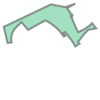

In [4]:
metroparks.loc[0, 'geometry']

# Plotting the GeoDataFrame using GeoPandas

<AxesSubplot:>

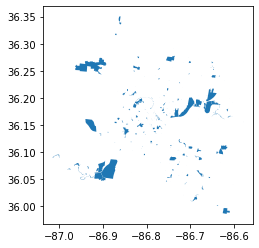

In [5]:
metroparks.plot()

# Adding styling and additional details

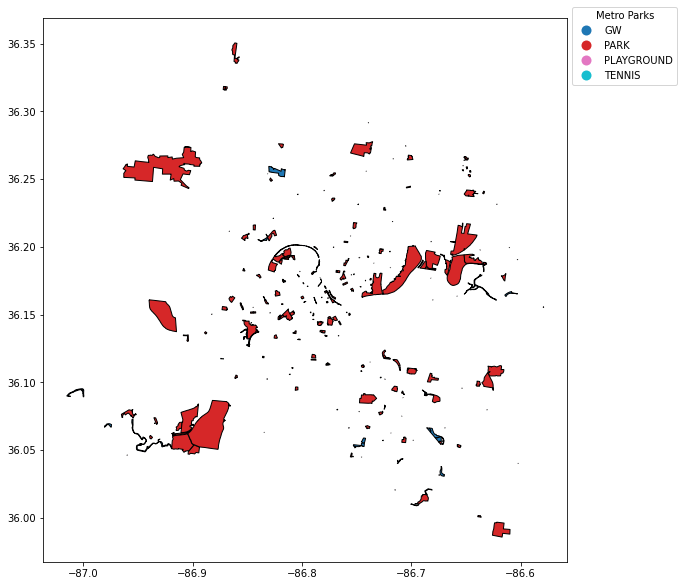

In [6]:
leg_kwds = {'title': 'Metro Parks', 'loc': 'upper left',
           'bbox_to_anchor': (1, 1.03), 'ncol': 1}

metroparks.plot(column = 'status', figsize=(10, 10), 
               edgecolor = 'black', 
               legend = True, legend_kwds = leg_kwds,
               cmap = 'tab10')
plt.show()

# Load in point geojson
Public Water Fountains and Hydration Systems (GIS) - https://data.nashville.gov/Environment/Public-Water-Fountains-and-Hydration-Systems-GIS-/72qu-fbsb

In [7]:
hydration = gpd.read_file('../data/hydration.geojson')
print(hydration.crs)
hydration.head()

epsg:4326


,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry
0,Beaman Water Fountain,None,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250)
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090)
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310)
3,West Park Water Fountain,Ballfield,N,45992,36.16179583,N,1,-86.86378994,Single with foot pedal,POINT (-86.86379 36.16180)
4,Richland Park Water Fountain,Playground,N,46012,36.15139384,N,1,-86.84589094,Single with foot pedal,POINT (-86.84589 36.15139)


In [8]:
hydration.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       73 non-null     object  
 1   location   65 non-null     object  
 2   dog        73 non-null     object  
 3   objectid   73 non-null     object  
 4   lon        73 non-null     object  
 5   ada        73 non-null     object  
 6   cnt        73 non-null     object  
 7   lat        73 non-null     object  
 8   feat_type  73 non-null     object  
 9   geometry   73 non-null     geometry
dtypes: geometry(1), object(9)
memory usage: 5.8+ KB


In [9]:
type(hydration)

geopandas.geodataframe.GeoDataFrame

# Reordering columns
Reordering columns in hydration so lat and lng are next to each other for readability.

In [10]:
hydration = hydration[['name', 'location', 'lon', 'lat', 'feat_type', 'ada', 'dog', 'objectid', 'cnt', 'geometry']]
hydration.head()

,name,location,lon,lat,feat_type,ada,dog,objectid,cnt,geometry
0,Beaman Water Fountain,None,36.26250456,-86.89425346,Fountain/Bottle filler/ADA,Y,Y,45921,1,POINT (-86.89425 36.26250)
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,36.06089915,-86.90622747,Bottle Filler/ADA,Y,N,45937,1,POINT (-86.90623 36.06090)
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,36.08310102,-86.86727566,ADA Bowl,Y,Y,45964,1,POINT (-86.86728 36.08310)
3,West Park Water Fountain,Ballfield,36.16179583,-86.86378994,Single with foot pedal,N,N,45992,1,POINT (-86.86379 36.16180)
4,Richland Park Water Fountain,Playground,36.15139384,-86.84589094,Single with foot pedal,N,N,46012,1,POINT (-86.84589 36.15139)


# Renaming Hydration lat/lon

In [11]:
hydration = hydration.rename(columns = {'lon': 'h_lon', 'lat': 'h_lat'})
hydration.head()

,name,location,h_lon,h_lat,feat_type,ada,dog,objectid,cnt,geometry
0,Beaman Water Fountain,None,36.26250456,-86.89425346,Fountain/Bottle filler/ADA,Y,Y,45921,1,POINT (-86.89425 36.26250)
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,36.06089915,-86.90622747,Bottle Filler/ADA,Y,N,45937,1,POINT (-86.90623 36.06090)
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,36.08310102,-86.86727566,ADA Bowl,Y,Y,45964,1,POINT (-86.86728 36.08310)
3,West Park Water Fountain,Ballfield,36.16179583,-86.86378994,Single with foot pedal,N,N,45992,1,POINT (-86.86379 36.16180)
4,Richland Park Water Fountain,Playground,36.15139384,-86.84589094,Single with foot pedal,N,N,46012,1,POINT (-86.84589 36.15139)


# Spatial join

In [12]:
hydration_in_parks = gpd.sjoin(hydration, metroparks, op= 'within')
hydration_in_parks.head()

,name_left,location,h_lon,h_lat,feat_type,ada,dog,objectid,cnt,geometry,index_right,acres,name_right,year_estab,common_nam,status,address,lon,lat,descriptio
0,Beaman Water Fountain,None,36.26250456,-86.89425346,Fountain/Bottle filler/ADA,Y,Y,45921,1,POINT (-86.89425 36.26250),4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,36.06089915,-86.90622747,Bottle Filler/ADA,Y,N,45937,1,POINT (-86.90623 36.06090),5,1113.12,Edwin Warner Park,1937,Edwin Warner,PARK,50 Vaughn Rd,-86.9074396,36.05688279,"Edwin Warner Park is a great, multi-recreation..."
29,Edwin Warner Dog Park Water Fountain,Dog Park,36.05195562,-86.90162012,Dog Only,N,Y,46595,1,POINT (-86.90162 36.05196),5,1113.12,Edwin Warner Park,1937,Edwin Warner,PARK,50 Vaughn Rd,-86.9074396,36.05688279,"Edwin Warner Park is a great, multi-recreation..."
30,Edwin Warner Concession Water Fountain,WNSL Concessions,36.04998346,-86.8981744,Standard/ADA,Y,N,46597,1,POINT (-86.89817 36.04998),5,1113.12,Edwin Warner Park,1937,Edwin Warner,PARK,50 Vaughn Rd,-86.9074396,36.05688279,"Edwin Warner Park is a great, multi-recreation..."
69,Harpeth River Greenway,Butler Field Trail Head,36.05133033,-86.91617134,Standard/ADA/Bottle Filler,N,Y,0,1,POINT (-86.91617 36.05133),5,1113.12,Edwin Warner Park,1937,Edwin Warner,PARK,50 Vaughn Rd,-86.9074396,36.05688279,"Edwin Warner Park is a great, multi-recreation..."


# Rename columns

In [14]:
hydration_in_parks = hydration_in_parks.rename(columns = {'name_left' : 'Hydration Name', 'location' : 'Hydration Location', 'feat_type' : 'Feature Type', 'name_right' : 'Park Name', 'common_nam' : 'Common Name', 'descriptio' : 'Description', 'ada' : 'ADA', 'dog' : 'Dog Friendly', 'acres' : 'Acres', 'status' : 'Type'})
hydration_in_parks.head()

,Hydration Name,Hydration Location,h_lon,h_lat,Feature Type,ADA,Dog Friendly,objectid,cnt,geometry,index_right,Acres,Park Name,year_estab,Common Name,Type,address,lon,lat,Description
0,Beaman Water Fountain,None,36.26250456,-86.89425346,Fountain/Bottle filler/ADA,Y,Y,45921,1,POINT (-86.89425 36.26250),4,2168.792,Alvin G. Beaman Park,1996,Beaman,PARK,5911 Old Hickory Blvd.,-86.91984207,36.26075833,Beaman Park provides education and awareness p...
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,36.06089915,-86.90622747,Bottle Filler/ADA,Y,N,45937,1,POINT (-86.90623 36.06090),5,1113.12,Edwin Warner Park,1937,Edwin Warner,PARK,50 Vaughn Rd,-86.9074396,36.05688279,"Edwin Warner Park is a great, multi-recreation..."
29,Edwin Warner Dog Park Water Fountain,Dog Park,36.05195562,-86.90162012,Dog Only,N,Y,46595,1,POINT (-86.90162 36.05196),5,1113.12,Edwin Warner Park,1937,Edwin Warner,PARK,50 Vaughn Rd,-86.9074396,36.05688279,"Edwin Warner Park is a great, multi-recreation..."
30,Edwin Warner Concession Water Fountain,WNSL Concessions,36.04998346,-86.8981744,Standard/ADA,Y,N,46597,1,POINT (-86.89817 36.04998),5,1113.12,Edwin Warner Park,1937,Edwin Warner,PARK,50 Vaughn Rd,-86.9074396,36.05688279,"Edwin Warner Park is a great, multi-recreation..."
69,Harpeth River Greenway,Butler Field Trail Head,36.05133033,-86.91617134,Standard/ADA/Bottle Filler,N,Y,0,1,POINT (-86.91617 36.05133),5,1113.12,Edwin Warner Park,1937,Edwin Warner,PARK,50 Vaughn Rd,-86.9074396,36.05688279,"Edwin Warner Park is a great, multi-recreation..."


# Remove extraneous columns

In [15]:
hydration_in_parks = hydration_in_parks[['Hydration Name', 'Hydration Location', 'h_lon', 'h_lat', 'Feature Type', 'ADA', 'Dog Friendly', 'geometry', 'Park Name', 'Type']]
hydration_in_parks.head()

,Hydration Name,Hydration Location,h_lon,h_lat,Feature Type,ADA,Dog Friendly,geometry,Park Name,Type
0,Beaman Water Fountain,None,36.26250456,-86.89425346,Fountain/Bottle filler/ADA,Y,Y,POINT (-86.89425 36.26250),Alvin G. Beaman Park,PARK
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,36.06089915,-86.90622747,Bottle Filler/ADA,Y,N,POINT (-86.90623 36.06090),Edwin Warner Park,PARK
29,Edwin Warner Dog Park Water Fountain,Dog Park,36.05195562,-86.90162012,Dog Only,N,Y,POINT (-86.90162 36.05196),Edwin Warner Park,PARK
30,Edwin Warner Concession Water Fountain,WNSL Concessions,36.04998346,-86.8981744,Standard/ADA,Y,N,POINT (-86.89817 36.04998),Edwin Warner Park,PARK
69,Harpeth River Greenway,Butler Field Trail Head,36.05133033,-86.91617134,Standard/ADA/Bottle Filler,N,Y,POINT (-86.91617 36.05133),Edwin Warner Park,PARK


# Reordering columns
Re-ordering post join for additional clarity and easier analysis

In [16]:
hydration_in_parks = hydration_in_parks[['Park Name', 'Type', 'Hydration Name', 'Hydration Location', 'Feature Type', 'ADA', 'Dog Friendly', 'h_lon', 'h_lat', 'geometry']]
hydration_in_parks.head()

,Park Name,Type,Hydration Name,Hydration Location,Feature Type,ADA,Dog Friendly,h_lon,h_lat,geometry
0,Alvin G. Beaman Park,PARK,Beaman Water Fountain,None,Fountain/Bottle filler/ADA,Y,Y,36.26250456,-86.89425346,POINT (-86.89425 36.26250)
1,Edwin Warner Park,PARK,Edwin Nature Center Water Fountain,Restrooms Breezeway,Bottle Filler/ADA,Y,N,36.06089915,-86.90622747,POINT (-86.90623 36.06090)
29,Edwin Warner Park,PARK,Edwin Warner Dog Park Water Fountain,Dog Park,Dog Only,N,Y,36.05195562,-86.90162012,POINT (-86.90162 36.05196)
30,Edwin Warner Park,PARK,Edwin Warner Concession Water Fountain,WNSL Concessions,Standard/ADA,Y,N,36.04998346,-86.8981744,POINT (-86.89817 36.04998)
69,Edwin Warner Park,PARK,Harpeth River Greenway,Butler Field Trail Head,Standard/ADA/Bottle Filler,N,Y,36.05133033,-86.91617134,POINT (-86.91617 36.05133)


In [17]:
hydration_in_parks.tail()

,Park Name,Type,Hydration Name,Hydration Location,Feature Type,ADA,Dog Friendly,h_lon,h_lat,geometry
52,City Cemetery,PARK,City Cemetery Water Fountain,Office Building,Single with foot pedal,N,N,36.14734313,-86.76952114,POINT (-86.76952 36.14734)
54,Ted Rhodes Park,PARK,Metro Center Levee Golf Trailhead Water Fountain,Trailhead,Dog Only,N,Y,36.19258668,-86.82485806,POINT (-86.82486 36.19259)
55,Public Square Park,PARK,Public Square Water Fountain,3rd Ave Steps Courthouse,Standard/ADA/Bottle Filler,N,Y,36.1665657,-86.77878659,POINT (-86.77879 36.16657)
57,None,GW,Stones River - YMCA Trailhead Water Fountain,Trailhead,Standard/ADA/Bottle Filler,N,N,36.17322358,-86.6475893,POINT (-86.64759 36.17322)
68,None,GW,Harpeth River Greenway,Morton Mill Rd at Old Harding Pike,Standard/ADA/Bottle Filler,N,Y,36.05899273,-86.94508441,POINT (-86.94508 36.05899)


# Count of hydration stations per park

In [18]:
hydration_in_parks['Park Name'].value_counts()

Riverfront Park                5
Edwin Warner Park              4
Cedar Hill                     4
Shelby Bottoms Park            3
Cane Ridge Park                3
Fannie Mae Dees Park           3
Shelby Park                    3
Two Rivers Park                2
Sevier Park                    2
McCabe Park                    2
Hadley Park                    1
Hermitage Park                 1
Isaac Litton School Park       1
Alvin G. Beaman Park           1
Parmer Park                    1
Elmington Park                 1
E. N. Peeler Park              1
Woodmont Park                  1
Bellevue Park                  1
City Cemetery                  1
Ted Rhodes Park                1
Fort Negley                    1
Bordeaux-Timothy Drive Park    1
Elizabeth Park                 1
Cumberland Park                1
Buena Vista Park               1
Bordeaux Garden Park           1
Bells Bend Park                1
England                        1
Seven Oaks Park                1
Providence

# Hydration in Riverfront Park

In [19]:
riverfront_hydration = hydration_in_parks.loc[hydration_in_parks['Park Name'] == 'Riverfront Park']
riverfront_hydration.shape

(5, 10)

In [20]:
polygonriverfront = metroparks.loc[metroparks['name'] == 'Riverfront Park']
polygonriverfront.shape

(4, 10)

# Plot polygon and points together

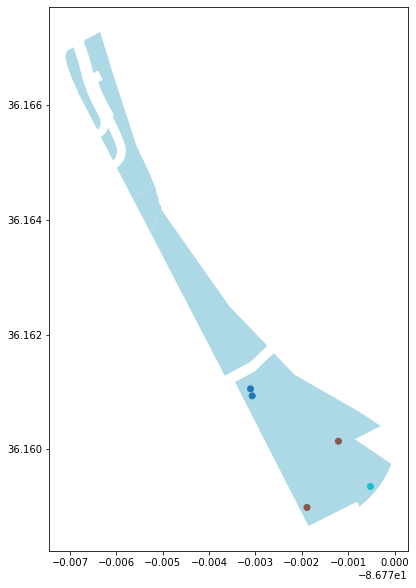

In [21]:
ax = polygonriverfront.plot(figsize = (8, 10), color = 'lightblue')
riverfront_hydration.plot( ax = ax, column = 'Hydration Name');
plt.show()

# Use folium for street view
Use GeoSeries attribute (.centroid) to find center of the lowest polygon as it is where the hydration stations are located.

In [22]:
polygonriverfront.geometry.centroid

C:\Users\cbrown\AppData\Local\Temp\ipykernel_24912\3043177243.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygonriverfront.geometry.centroid


53     POINT (-86.77611 36.16584)
55     POINT (-86.77530 36.16424)
59     POINT (-86.77404 36.16256)
184    POINT (-86.77175 36.16015)
dtype: geometry

In [23]:
center = polygonriverfront.centroid[184]
print(center)

POINT (-86.77175483423353 36.16014907072041)


C:\Users\cbrown\AppData\Local\Temp\ipykernel_24912\3462709110.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygonriverfront.centroid[184]


# Converting location point to an array

In [24]:
area_center = [center.y, center.x]
print(area_center)

[36.160149070720415, -86.77175483423353]


# Create folium map

In [25]:
map_riverfront = folium.Map(location = area_center, zoom_start = 16)
map_riverfront

# Add park polygon and hydration markers
Use iterrows() to generate tuples of row id and value.

In [26]:
i = 0
for row_index, row_values in riverfront_hydration.iterrows():
    if i<=1:
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('-------------------')
        i+1

index is 21
values are:
 
Park Name                                          Riverfront Park
Type                                                          PARK
Hydration Name                   Ascend Amphiteater Water Fountain
Hydration Location                                        Building
Feature Type                            Standard/ADA/Bottle Filler
ADA                                                              N
Dog Friendly                                                     N
h_lon                                                   36.1589887
h_lat                                                 -86.77188799
geometry              POINT (-86.77188799128072 36.15898870023951)
Name: 21, dtype: object
-------------------
index is 44
values are:
 
Park Name                                          Riverfront Park
Type                                                          PARK
Hydration Name                  Ascend Fitness Area Water Fountain
Hydration Location               

# Include additional map features

In [31]:
map_riverfront = folium.Map(location = area_center, zoom_start = 16)

folium.GeoJson(polygonriverfront).add_to(map_riverfront)

for row_index, row_values in riverfront_hydration.iterrows():
    loc = [row_values['h_lat'], row_values['h_lon']]
    pop = str(row_values['Hydration Name'])
    icon=folium.Icon(color="blue",icon="tint", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 
   
    marker.add_to(map_riverfront)
map_riverfront.save('../maps/map_riverfront.html')

map_riverfront

In [28]:
riverfront_hydration.head()

,Park Name,Type,Hydration Name,Hydration Location,Feature Type,ADA,Dog Friendly,h_lon,h_lat,geometry
21,Riverfront Park,PARK,Ascend Amphiteater Water Fountain,Building,Standard/ADA/Bottle Filler,N,N,36.1589887,-86.77188799,POINT (-86.77189 36.15899)
44,Riverfront Park,PARK,Ascend Fitness Area Water Fountain,Fitness Area,Standard/ADA/Bottle Filler,N,N,36.15935444,-86.77052029,POINT (-86.77052 36.15935)
45,Riverfront Park,PARK,Acend Dog Park Water Fountain,Dog Park,Standard/ADA/Bottle Filler,N,Y,36.16105409,-86.77310593,POINT (-86.77311 36.16105)
46,Riverfront Park,PARK,Acend Dog Park Water Fountain,Dog Park,Standard/ADA/Bottle Filler,N,Y,36.16093199,-86.77307034,POINT (-86.77307 36.16093)
71,Riverfront Park,PARK,Ascend Amphiteater Water Fountain,Building,Standard/ADA/Bottle Filler,N,N,36.16014227,-86.77120998,POINT (-86.77121 36.16014)


Error in including additional map features because lat and lon are no longer available in the riverfront_hydration geodataframe? Maybe?

4/19 Update - corrected step that removed h_lat and h_lon details from geodataframe but markers for hydration locations are not being displayed.